TA MED LOW-NTF-GIDDENS!!!

# Plot temperature response over time

This notebook does the same as [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) except that it varies the ECS parameter and outputs a table of changes in temperature with respect to some reference year (defined below).

In [1]:
import pandas as pd

In [2]:
from ar6_ch6_rcmipfigs.constants import INPUT_DATA_DIR

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


**Output table found in:**

### General about computing $\Delta T$:

We compute the change in GSAT temperature ($\Delta T$) from the effective radiative forcing (ERF) estimated from [Smith 2020](https://zenodo.org/record/3973015), by integrating with the impulse response function (IRF(t-t'))
#todo: check for ref for IRF
(Geoffroy at al 2013).

For any forcing agent $x$, with estimated ERF$_x$, the change in temperature $\Delta T$ is calculated as:


\begin{align*}
\Delta T_x (t) &= \int_0^t ERF_x(t') IRF(t-t') dt' \\
\end{align*}

#### The Impulse response function (IRF):
In these calculations we use:
\begin{align*}
IRF(t) = \frac{q_1}{d_1} \exp\Big(\frac{-t}{d_1}\Big) + \frac{q_2}{d_2} \exp\Big(\frac{-t}{d_2}\Big)
\end{align*}

Where the constants, $q_i$ and $d_i$ are from XXXXXX????

## Input data:
See [README.md](../../README.md)

# Code + figures

In [3]:
fn_IRF_constants = INPUT_DATA_DIR / 'irf_from_2xCO2_2020_12_02_050025-1.csv'
irf_consts = pd.read_csv(fn_IRF_constants).set_index('id')

ld1 = 'd1 (yr)'
ld2 = 'd2 (yr)'
lq1 = 'q1 (K / (W / m^2))'
lq2 = 'q2 (K / (W / m^2))'
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'
irf_consts  # [d1]

,C (W yr / m^2 / K),C_d (W yr / m^2 / K),alpha (W / m^2 / K),eta (dimensionless),kappa (W / m^2 / K),d1 (yr),d2 (yr),q1 (K / (W / m^2)),q2 (K / (W / m^2)),efficacy (dimensionless),ecs (K),tcr (K),rf2xCO2 (W / m^2)
id,,,,,,,,,,,,,
median,18.882199,74.696905,1.326450,1.842415,0.245947,10.514430,411.184413,0.551673,0.202220,1.842415,2.956595,1.902808,3.921774
5th percentile,13.863160,71.008211,1.661241,1.621780,0.362412,6.112719,267.486167,0.437167,0.164793,1.621780,2.037291,1.417367,3.384431
95th percentile,20.094672,127.347922,0.983305,1.498099,0.362468,12.988083,552.802552,0.637427,0.379552,1.498099,4.519303,2.411874,4.443852
ensemble member 0,14.376108,181.972962,1.140837,0.623533,0.614109,9.357974,399.022327,0.645521,0.231028,0.623533,3.622535,2.390378,4.132722
ensemble member 2,9.213528,145.859092,1.552934,1.134904,0.587564,4.129695,356.642686,0.445928,0.198014,1.134904,2.134403,1.451264,3.314588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ensemble member 596,19.096039,120.353129,1.211832,0.940455,0.412653,11.814680,389.001769,0.612230,0.212967,0.940455,3.256443,2.080608,3.946262
ensemble member 594,9.550309,61.534455,2.145485,2.176843,0.282746,3.446667,281.070348,0.359590,0.106505,2.176843,2.046529,1.554830,4.390797
ensemble member 595,10.014547,81.151740,0.676789,2.504343,0.204552,8.345005,703.468878,0.825554,0.652012,2.504343,5.191214,2.665050,3.513355


In [4]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'

PATH_DT_TAB_OUTPUT = RESULTS_DIR / 'tables' / 'table_sens_dT_cs.csv'
PATH_DT_OUTPUT = OUTPUT_DATA_DIR / 'dT_data_RCMIP.nc'

**Output table found in:**

In [5]:
print(PATH_DT_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_data_RCMIP.nc


## Imports:

In [6]:
import xarray as xr
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [7]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'
percentile = 'percentile'

## Set values:

ECS parameters:

In [8]:
IRFpercentiles = [perc5, median, perc95]
# {'ECS = 2K':0.526, 'ECS = 3.4K':0.884, 'ECS = 5K': 1.136 }

Year to integrate from and to:

In [9]:
first_y = '1750'
last_y = '2100'

**Set reference year for temperature change:**

In [10]:
ref_year = '2021'

**Years to output change in**

In [11]:
years = ['2040', '2100']

## IRF:

In [12]:

def IRF(t, d1, q1, d2, q2):
    """
    Returns the IRF function for:
    :param q2:
    :param d2:
    :param q1:
    :param d1:
    :param t: Time in years
    :return:
    IRF
    """
    irf = q1 / d1 * np.exp(-t / d1) + q2 / d2 * np.exp(-t / d2)
    return irf
    # l * (alpha1 * np.exp(-t / tau1) + alpha2 * np.exp(-t / tau2))

## ERF:
Read ERF from file

### Define variables to look at:

In [13]:
# variables to plot:
variables_erf_comp = [
    'ch4',
    'aerosol-radiation_interactions',
    'aerosol-cloud_interactions',
    'aerosol-total',
    'o3',
    'HFCs',
    # 'F-Gases|HFC',
    'bc_on_snow',
    'total_anthropogenic',
    'total',
]
# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:
scenarios_fl = ['ssp534-over', 'ssp119', 'ssp460', 'ssp585', 'ssp370',
                'ssp370-lowNTCF-aerchemmip', 'ssp126', 'ssp245', 'ssp434',
                'ssp370-lowNTCF-gidden'
                ]

### Open dataset:

In [14]:
ds = xr.open_dataset(PATH_DATASET).sel(year=slice(1700, 2200))  # we need only years until 1700
da_ERF = ds['ERF']

# ds['time'] = \
# ds['year'].to_pandas().index.map('{}-01-01'.format)
ds['time'] = pd.to_datetime(ds['year'].to_pandas().index.map(str), format='%Y')

# delta_t is 1 (year)
ds['delta_t'] = xr.DataArray(np.ones(len(ds['year'])), dims='year', coords={'year': ds['year']})

## Integrate:
The code below integrates the read in ERFs with the pre defined impulse response function (IRF).

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

In [15]:
name_deltaT = 'Delta T'


def integrate_(i, _var, _nvar, ds_in: xr.Dataset, ds_DT, irf_cnst: dict):
    """

    :param i:
    :param _var:
    :param _nvar:
    :param ds_in:
    :param ds_DT:
    :param irf_cnst: dictionary
    :return:
    """
    # lets create a ds that goes from 0 to i inclusive
    ds_short = ds_in[{'year': slice(0, i + 1)}].copy()
    #print(ds_short)
    # lets get the current year
    current_year = ds_short['year'][{'year': i}]  # .dt.year
    # lets get a list of years
    _years = ds_short['year']  # .dt.year
    # lets get the year delta until current year(i)
    ds_short['end_year_delta'] = current_year - _years

    # lets get the irf values from 0 until i
    d1 = irf_cnst[ld1]
    d2 = irf_cnst[ld2]
    q1 = irf_cnst[lq1]
    q2 = irf_cnst[lq2]

    ds_short['irf'] = IRF(
        ds_short['end_year_delta'] * ds_short['delta_t'], d1, q1, d2, q2)

    # lets do the famous integral
    ds_short['to_integrate'] = \
        ds_short[_var] * \
        ds_short['irf'] * \
        ds_short['delta_t']

    # lets sum all the values up until i and set
    # this value at ds_DT
    # If whole array is null, set value to nan
    if np.all(ds_short['to_integrate'].isnull()):  # or last_null:
        _val = np.nan
    else:
        # 

        _ds_int = ds_short['to_integrate'].sum(['year'])
        # mask where last value is null (in order to not get intgral 
        _ds_m1 = ds_short['to_integrate'].isel(year=-1)
        # where no forcing data)
        _val = _ds_int.where(_ds_m1.notnull())
    # set value in dataframe:
    ds_DT[_nvar][{'year': i}] = _val


def integrate_to_dT(_ds, from_t, to_t, irf_cnsts, int_var='ERF'):
    """
    Integrate forcing to temperature change.

    :param _ds: dataset containing the forcings
    :param from_t: start year
    :param to_t: end year
    :param int_var: variables to integrate
    :param irf_cnsts: irf constants
    :return:
    """
    # slice dataset
    ds_sl = _ds.sel(year=slice(from_t, to_t))
    len_time = len(ds_sl['year'])
    # lets create a result DS
    ds_DT = ds_sl.copy()

    # lets define the vars of the ds
    namevar = name_deltaT
    # set all values to zero for results dataarray:
    ds_DT[namevar] = ds_DT[int_var] * 0
    # Units Kelvin:
    ds_DT[namevar].attrs['unit'] = 'K'
    if 'unit' in ds_DT[namevar].coords:
        ds_DT[namevar].coords['unit'] = 'K'

    for i in range(len_time):
        # da = ds[var]
        if (i % 20) == 0:
            print('%s of %s done' % (i, len_time))
        integrate_(i, int_var, namevar, ds_sl, ds_DT, irf_cnsts)
    clear_output()
    # fn = 'DT_%s-%s.nc' % (from_t, to_t)
    # fname = OUTPUT_DATA_DIR/ fn#'DT_%s-%s.nc' % (from_t, to_t)
    # save dataset.
    # ds_DT.to_netcdf(fname)
    return ds_DT

## Compute $\Delta T$ with 3 different climate sensitivities

In [16]:
ds

<xarray.Dataset>
Dimensions:   (scenario: 10, variable: 18, year: 451)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2196 2197 2198 2199 2200
  * variable  (variable) object 'co2' 'ch4' 'n2o' ... 'aerosol-total' 'HFCs'
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'
Data variables:
    ERF       (scenario, variable, year) float64 ...
    time      (year) datetime64[ns] 1750-01-01 1751-01-01 ... 2200-01-01
    delta_t   (year) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0

In [17]:
# noinspection PyStatementEffect
irf_consts.loc[median][ld1]

10.514430258366302

In [18]:
dic_ds = {}
for key in IRFpercentiles:
    dic_ds[key] = integrate_to_dT(ds, first_y, last_y, irf_consts.loc[key], int_var='ERF')

## check:

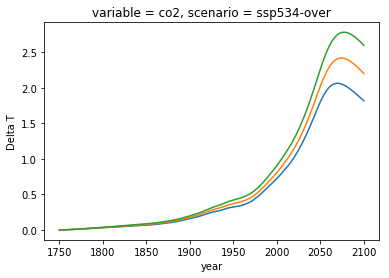

In [19]:
for per in IRFpercentiles:
    dic_ds[per].isel(scenario=0, variable=0)[name_deltaT].plot()

### Make datset with percentile as dimension:

In [20]:
ds_tmp = xr.Dataset(coords=dic_ds[median].coords)
ds_tmp
for key in IRFpercentiles:
    ds_tmp[key] = dic_ds[key]['Delta T']  # .dims,dic_ds[key],)
ds['Delta T'] = ds_tmp.to_array('percentile')
ds.sel(year=slice(first_y, last_y)).to_netcdf(PATH_DT_OUTPUT)
# ds_DT.to_array('percentile')
# dic_ds[key]['Delta T']

## Table

### Setup table:

In [21]:

iterables = [list(IRFpercentiles), years]


def setup_table(scenario_n='', variables=variables_all):
    _i = pd.MultiIndex.from_product(iterables, names=['', ''])
    table = pd.DataFrame(columns= variables, index=_i).transpose()
    table.index.name = scenario_n
    return table

In [22]:
# Dicitonary of tables with different ESC:
scntab_dic = {}
for scn in scenarios_fl:
    # Loop over scenrarios
    tab = setup_table(scenario_n=scn, variables=variables_erf_comp)  # make table
    for var in variables_erf_comp:
        # Loop over variables
        tabvar = var.split('|')[-1]
        dtvar = name_deltaT
        for key in IRFpercentiles:
            # Loop over ESC parameters
            for year in years:
                _tab_da = dic_ds[key][dtvar].sel(scenario=scn, year=slice(year, year)) - dic_ds[key][dtvar].sel(
                    scenario=scn, year=slice(ref_year, ref_year)).squeeze()
                a = float(_tab_da.loc[var].squeeze().values)
                tab.loc[tabvar, (key, year)] = a
    scntab_dic[scn] = tab.copy()

In [23]:
from IPython.display import display

for key in scntab_dic:
    display(scntab_dic[key])

5th percentile                  median  \
                                         2040        2100        2040   
ssp534-over                                                             
ch4                                 0.0502358   -0.162024   0.0542516   
aerosol-radiation_interactions      0.0332287  0.00274014   0.0521647   
aerosol-cloud_interactions          0.0918387    0.395997    0.106333   
aerosol-total                        0.125067    0.398737    0.158498   
o3                                  0.0360157    -0.12582   0.0411426   
HFCs                                0.0351062   0.0142348   0.0369414   
bc_on_snow                        -0.00145511   -0.042073  0.00128484   
total_anthropogenic                  0.719302    0.796087    0.825389   
total                                0.687072    0.749925     0.79256   

                                          95th percentile             
                                     2100            2040       2100  
ssp534-over                                                           
ch4                              -0.17919       0.0615596   -0.18467  
aerosol-radiation_interactions  0.0265358       0.0609276  0.0390851  
aerosol-cloud_interactions       0.485963        0.111423   0.547897  
aerosol-total                    0.512499        0.172351   0.586982  
o3                              -0.140858       0.0484026  -0.145618  
HFCs                            0.0237552       0.0394378  0.0326612  
bc_on_snow                     -0.0466424       0.0030668 -0.0498422  
total_anthropogenic               1.13644        0.925887    1.46818  
total                             1.08152        0.894806    1.40966

5th percentile                 median  \
                                         2040        2100       2040   
ssp119                                                                 
ch4                                -0.0254531   -0.155654 -0.0164059   
aerosol-radiation_interactions      0.0319771   0.0427627  0.0459718   
aerosol-cloud_interactions           0.243446    0.407219   0.261404   
aerosol-total                        0.275423    0.449981   0.307376   
o3                                  -0.062929   -0.134469 -0.0568928   
HFCs                               0.00677655 -0.00332873  0.0108837   
bc_on_snow                         -0.0250277  -0.0401196 -0.0242442   
total_anthropogenic                  0.383339    0.101647   0.513048   
total                                0.351109   0.0554857   0.480219   

                                            95th percentile              
                                       2100            2040        2100  
ssp119                                                                   
ch4                               -0.176115      -0.0100567   -0.187331  
aerosol-radiation_interactions    0.0647635       0.0526851   0.0775509  
aerosol-cloud_interactions         0.502478          0.2734    0.572101  
aerosol-total                      0.567242        0.326085    0.649651  
o3                                -0.156076      -0.0530261   -0.168985  
HFCs                           -0.000460781       0.0131765  0.00185192  
bc_on_snow                       -0.0472427      -0.0241137  -0.0526091  
total_anthropogenic                0.264493        0.609389    0.434037  
total                              0.209564        0.578308    0.375517

5th percentile                  median  \
                                         2040       2100         2040   
ssp460                                                                  
ch4                                 0.0679704   0.149632    0.0733692   
aerosol-radiation_interactions      0.0186237 -0.0123036    0.0349479   
aerosol-cloud_interactions        -0.00519956   0.237244 -0.000206007   
aerosol-total                       0.0134241    0.22494    0.0347419   
o3                                   0.047895  0.0800619    0.0542529   
HFCs                                0.0316111  0.0394666    0.0329585   
bc_on_snow                         0.00865682 -0.0254436    0.0121609   
total_anthropogenic                  0.563672     2.0133     0.664613   
total                                0.531442    1.96714     0.631784   

                                           95th percentile             
                                      2100            2040       2100  
ssp460                                                                 
ch4                               0.182791        0.081847   0.221665  
aerosol-radiation_interactions  0.00488378         0.04212  0.0118188  
aerosol-cloud_interactions        0.274219     -0.00248487   0.291406  
aerosol-total                     0.279103       0.0396351   0.303225  
o3                                0.103274       0.0623964   0.131593  
HFCs                             0.0548754       0.0351291  0.0682224  
bc_on_snow                       -0.024774       0.0146184 -0.0235015  
total_anthropogenic                2.44237           0.757    2.86605  
total                              2.38744        0.725919    2.80753

5th percentile                  median  \
                                         2040        2100        2040   
ssp585                                                                  
ch4                                 0.0470272    0.125248   0.0510205   
aerosol-radiation_interactions      0.0332287 -0.00137579   0.0521647   
aerosol-cloud_interactions          0.0918387    0.264171    0.106333   
aerosol-total                        0.125067    0.262795    0.158498   
o3                                  0.0339856   0.0471007    0.039109   
HFCs                                0.0350987    0.199742   0.0369336   
bc_on_snow                        -0.00145511  -0.0304724  0.00128484   
total_anthropogenic                  0.708918     3.61946    0.815046   
total                                0.676688      3.5733    0.782217   

                                          95th percentile             
                                     2100            2040       2100  
ssp585                                                                
ch4                              0.158296       0.0582001    0.19567  
aerosol-radiation_interactions  0.0196998       0.0609276  0.0299541  
aerosol-cloud_interactions       0.315827        0.111423   0.347497  
aerosol-total                    0.335527        0.172351   0.377451  
o3                              0.0726126       0.0462916   0.100626  
HFCs                             0.231585       0.0394297   0.261196  
bc_on_snow                     -0.0313247       0.0030668 -0.0316869  
total_anthropogenic               4.22973        0.915169    4.83678  
total                              4.1748        0.884088    4.77826

5th percentile                  median  \
                                         2040        2100        2040   
ssp370                                                                  
ch4                                  0.059219    0.233781    0.064004   
aerosol-radiation_interactions       0.017213  0.00858324   0.0312018   
aerosol-cloud_interactions         -0.0425163  0.00780781  -0.0408731   
aerosol-total                      -0.0253033    0.016391 -0.00967124   
o3                                  0.0583312    0.203219   0.0652059   
HFCs                                0.0228593   0.0863777   0.0254467   
bc_on_snow                          0.0135132  0.00638248    0.017046   
total_anthropogenic                  0.578979     2.77362    0.674413   
total                                0.546749     2.72746    0.641584   

                                          95th percentile              
                                     2100            2040        2100  
ssp370                                                                 
ch4                              0.271785        0.071923    0.316712  
aerosol-radiation_interactions  0.0265715       0.0373935   0.0350263  
aerosol-cloud_interactions       0.010149      -0.0459395 -0.00440199  
aerosol-total                   0.0367205     -0.00854605   0.0306243  
o3                               0.239299       0.0739643    0.280942  
HFCs                             0.102139       0.0277669    0.116966  
bc_on_snow                      0.0116185        0.019705   0.0172021  
total_anthropogenic               3.24756        0.765209     3.73208  
total                             3.19263        0.734128     3.67356

5th percentile                  median  \
                                         2040       2100         2040   
ssp370-lowNTCF-aerchemmip                                               
ch4                                  0.059219   0.233781     0.064004   
aerosol-radiation_interactions      0.0222007  0.0240355    0.0362934   
aerosol-cloud_interactions          0.0778268   0.303627    0.0794246   
aerosol-total                        0.100028   0.327662     0.115718   
o3                                  0.0226131    0.13436     0.029017   
HFCs                                0.0228593  0.0863777    0.0254467   
bc_on_snow                         -0.0041208  -0.029627 -0.000667837   
total_anthropogenic                  0.650993    2.97057     0.745935   
total                                0.618764    2.92441     0.713106   

                                          95th percentile             
                                     2100            2040       2100  
ssp370-lowNTCF-aerchemmip                                             
ch4                              0.271785        0.071923   0.316712  
aerosol-radiation_interactions  0.0463328       0.0427221  0.0584454  
aerosol-cloud_interactions       0.365426       0.0789717   0.405905  
aerosol-total                    0.411759        0.121694   0.464351  
o3                               0.155982       0.0362349   0.184158  
HFCs                             0.102139       0.0277669   0.116966  
bc_on_snow                     -0.0318657      0.00128426  -0.033216  
total_anthropogenic               3.48562        0.839336     4.0076  
total                             3.43069        0.808255    3.94908

5th percentile                  median  \
                                         2040        2100        2040   
ssp126                                                                  
ch4                                -0.0163691   -0.148331 -0.00853214   
aerosol-radiation_interactions      0.0269624   0.0516766   0.0393717   
aerosol-cloud_interactions           0.202752    0.406946    0.218108   
aerosol-total                        0.229714    0.458622     0.25748   
o3                                  -0.043855   -0.133008  -0.0384577   
HFCs                                0.0161578 -0.00124849   0.0197257   
bc_on_snow                         -0.0210601  -0.0380766  -0.0202685   
total_anthropogenic                  0.460442    0.489169    0.576862   
total                                0.428213    0.443008    0.544033   

                                           95th percentile              
                                      2100            2040        2100  
ssp126                                                                  
ch4                               -0.16605     -0.00231184   -0.174588  
aerosol-radiation_interactions   0.0764223       0.0453244   0.0914869  
aerosol-cloud_interactions        0.499246        0.227709    0.565805  
aerosol-total                     0.575669        0.273034    0.657291  
o3                               -0.152359      -0.0341499   -0.162907  
HFCs                            0.00235895       0.0221461  0.00551045  
bc_on_snow                      -0.0442687      -0.0199934  -0.0487824  
total_anthropogenic               0.723288        0.671155    0.958703  
total                             0.668359        0.640074    0.900184

5th percentile                 median  \
                                         2040       2100        2040   
ssp245                                                                 
ch4                                 0.0327353 -0.0117235   0.0388736   
aerosol-radiation_interactions     0.00840442   0.012048   0.0228258   
aerosol-cloud_interactions          0.0547676   0.313721   0.0644327   
aerosol-total                        0.063172   0.325769   0.0872585   
o3                                  0.0164113 -0.0440259   0.0225677   
HFCs                                0.0246892  0.0516919   0.0275604   
bc_on_snow                        -0.00417931 -0.0363605 -0.00193313   
total_anthropogenic                  0.513708    1.56222    0.620858   
total                                0.481478    1.51605    0.588029   

                                          95th percentile              
                                     2100            2040        2100  
ssp245                                                                 
ch4                            -0.0063659        0.046294  0.00720316  
aerosol-radiation_interactions  0.0319727       0.0289125   0.0417342  
aerosol-cloud_interactions       0.378019       0.0663779    0.418123  
aerosol-total                    0.409992       0.0952904    0.459858  
o3                             -0.0437196       0.0294098  -0.0360374  
HFCs                            0.0638183       0.0300513   0.0749457  
bc_on_snow                      -0.039955    -0.000462923  -0.0422133  
total_anthropogenic               1.93755        0.713853     2.30757  
total                             1.88262        0.682772     2.24905

5th percentile                  median  \
                                         2040        2100        2040   
ssp434                                                                  
ch4                                 0.0435747    0.101382   0.0507046   
aerosol-radiation_interactions      0.0305282  0.00803306   0.0464258   
aerosol-cloud_interactions          0.0541517    0.292619   0.0569238   
aerosol-total                       0.0846799    0.300652     0.10335   
o3                                  0.0242751   0.0390215   0.0321092   
HFCs                               0.00488078 -0.00616186  0.00840967   
bc_on_snow                         0.00232362  -0.0295881   0.0060305   
total_anthropogenic                   0.47825    0.980903    0.589305   
total                                 0.44602    0.934741    0.556476   

                                           95th percentile              
                                      2100            2040        2100  
ssp434                                                                  
ch4                               0.125284       0.0589417    0.155223  
aerosol-radiation_interactions   0.0293788       0.0538805   0.0404432  
aerosol-cloud_interactions        0.343974       0.0560191    0.376347  
aerosol-total                     0.373353          0.1099     0.41679  
o3                               0.0549961       0.0399381   0.0758008  
HFCs                           -0.00387808       0.0104083 -0.00206577  
bc_on_snow                      -0.0299495      0.00832913   -0.029897  
total_anthropogenic                1.28536        0.682279     1.58546  
total                              1.23043        0.651198     1.52694

5th percentile                  median  \
                                         2040       2100         2040   
ssp370-lowNTCF-gidden                                                   
ch4                                -0.0268241  -0.122665   -0.0152726   
aerosol-radiation_interactions      0.0222007  0.0240355    0.0362934   
aerosol-cloud_interactions          0.0778268   0.303627    0.0794246   
aerosol-total                        0.100028   0.327662     0.115718   
o3                                 -0.0301655 -0.0936935   -0.0197647   
HFCs                                0.0228991  0.0747876    0.0255205   
bc_on_snow                         -0.0041208  -0.029627 -0.000667837   
total_anthropogenic                  0.505174    2.32421     0.611687   
total                                0.472945    2.27805     0.578858   

                                          95th percentile             
                                     2100            2040       2100  
ssp370-lowNTCF-gidden                                                 
ch4                              -0.14287     -0.00802256  -0.153011  
aerosol-radiation_interactions  0.0463328       0.0427221  0.0584454  
aerosol-cloud_interactions       0.365426       0.0789717   0.405905  
aerosol-total                    0.411759        0.121694   0.464351  
o3                              -0.107453      -0.0130099  -0.113157  
HFCs                            0.0894802       0.0278538   0.103176  
bc_on_snow                     -0.0318657      0.00128426  -0.033216  
total_anthropogenic               2.73643         0.70399    3.16073  
total                              2.6815        0.672909    3.10221

### Make table with all scenarios:

In [24]:
iterables = [list(IRFpercentiles), years]
iterables2 = [scenarios_fl, variables_erf_comp]


def setup_table2():  # scenario_n=''):
    _i = pd.MultiIndex.from_product(iterables, names=['', ''])
    _r = pd.MultiIndex.from_product(iterables2, names=['', ''])

    table = pd.DataFrame(columns=_r, index=_i).transpose()
    return table

In [25]:
tab = setup_table2()  # scenario_n=scn)

for scn in scenarios_fl:
    for var in variables_erf_comp:
        tabvar = var#.split('|')[-1]
        dtvar = name_deltaT
        for key in IRFpercentiles:
            for year in years:
                # compute difference between year and ref year
                _da_y = dic_ds[key][dtvar].sel(scenario=scn, year=slice(year, year), variable=var)  # .squeeze()
                _da_refy = dic_ds[key][dtvar].sel(scenario=scn, year=slice(ref_year, ref_year), variable=var).squeeze()
                # _tab_da = dic_ds[key][dtvar].sel(scenario=scn, time=slice(year,year))-  dic_ds[key][dtvar].sel(scenario=scn, time=slice(ref_year,ref_year)).squeeze()
                _tab_da = _da_y - _da_refy

                tab.loc[(scn, tabvar), (key, year)] = _tab_da.squeeze().values  # [0]

In [26]:
tab

5th percentile  \
                                                                        2040   
                                                                               
ssp534-over           ch4                               0.050235797128932225   
                      aerosol-radiation_interactions    0.033228720100356574   
                      aerosol-cloud_interactions         0.09183865943710223   
                      aerosol-total                       0.1250673795374589   
                      o3                                 0.03601565023738912   
...                                                                      ...   
ssp370-lowNTCF-gidden o3                                -0.03016549690384604   
                      HFCs                               0.02289913593027447   
                      bc_on_snow                      -0.0041208032091562125   
                      total_anthropogenic                 0.5051740574886918   
                      total                              0.47294450058345916   

                                                                             \
                                                                       2100   
                                                                              
ssp534-over           ch4                              -0.16202363050892385   
                      aerosol-radiation_interactions  0.0027401392778047817   
                      aerosol-cloud_interactions        0.39599656997541666   
                      aerosol-total                      0.3987367092532216   
                      o3                               -0.12582044503875234   
...                                                                     ...   
ssp370-lowNTCF-gidden o3                               -0.09369352682038815   
                      HFCs                              0.07478761384370357   
                      bc_on_snow                       -0.02962703281135558   
                      total_anthropogenic                2.3242072495809456   
                      total                              2.2780457328010915   

                                                                      median  \
                                                                        2040   
                                                                               
ssp534-over           ch4                                0.05425158933260826   
                      aerosol-radiation_interactions      0.0521646864661581   
                      aerosol-cloud_interactions         0.10633346433682361   
                      aerosol-total                      0.15849815080298169   
                      o3                                 0.04114260413887494   
...                                                                      ...   
ssp370-lowNTCF-gidden o3                               -0.019764730783601525   
                      HFCs                               0.02552054676369544   
                      bc_on_snow                      -0.0006678370083727306   
                      total_anthropogenic                 0.6116870816630904   
                      total                               0.5788581002673059   

                                                                            \
                                                                      2100   
                                                                             
ssp534-over           ch4                             -0.17918993381877238   
                      aerosol-radiation_interactions   0.02653578100851453   
                      aerosol-cloud_interactions       0.48596294921736766   
                      aerosol-total                     0.5124987302258821   
                      o3                              -0.14085804373518943   
...                                                                    ...   
ssp370-lowN

## Save output

In [27]:
tab.to_csv(PATH_DT_TAB_OUTPUT)

In [28]:
PATH_DT_TAB_OUTPUT

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables/table_sens_dT_cs.csv')

## Double check historical $\Delta$ T: 


In [29]:
from matplotlib.ticker import (MultipleLocator)

from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic

<IPython.core.display.Javascript object>

In [30]:
ls_vars = ['aerosol-total', 'ch4', 'co2', 'other_wmghg', 'o3','HFCs']

In [31]:
cdic = get_cmap_dic(ls_vars)

/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/pandas/core/indexing.py:1761: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [32]:
ds

<xarray.Dataset>
Dimensions:     (percentile: 3, scenario: 10, variable: 18, year: 451)
Coordinates:
  * year        (year) int64 1750 1751 1752 1753 1754 ... 2197 2198 2199 2200
  * variable    (variable) object 'co2' 'ch4' 'n2o' ... 'aerosol-total' 'HFCs'
  * scenario    (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'
  * percentile  (percentile) <U15 '5th percentile' 'median' '95th percentile'
Data variables:
    ERF         (scenario, variable, year) float64 ...
    time        (year) datetime64[ns] 1750-01-01 1751-01-01 ... 2200-01-01
    delta_t     (year) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    Delta T     (percentile, scenario, variable, year) float64 0.0 ... nan

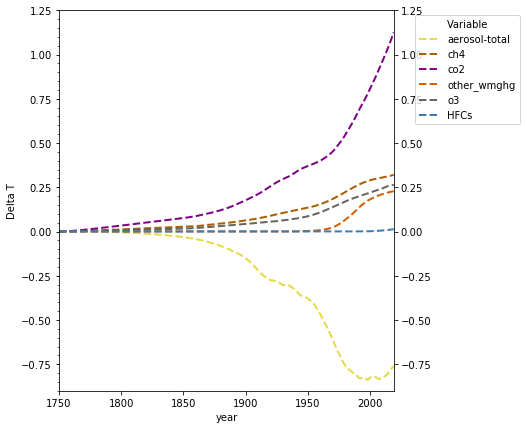

In [33]:

fig, ax = plt.subplots(figsize=[6, 7])

ds_hist = ds.sel(year=slice(1750, 2019), percentile='median', scenario='ssp119', variable=ls_vars)
for var in ds_hist.variable.values:
    ds_hist.sel(variable=var)[name_deltaT].plot(label=var, linestyle='dashed', linewidth=2, c=cdic[var])
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')  # , prop=fontP)
ax.yaxis.set_major_locator(MultipleLocator(.25))
ax.yaxis.set_minor_locator(MultipleLocator(.05))
ax.tick_params(right=True, labelright=True)
ax.set_xlim([1750, 2019])
ax.set_ylim([-0.9, 1.25])
plt.title('')
plt.savefig('test.pdf')
plt.show()

In [34]:
da_ERF.scenario

<xarray.DataArray 'scenario' (scenario: 10)>
array(['ssp534-over', 'ssp370-lowNTCF-gidden', 'ssp119', 'ssp370', 'ssp434',
       'ssp460', 'ssp585', 'ssp126', 'ssp245', 'ssp370-lowNTCF-aerchemmip'],
      dtype=object)
Coordinates:
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'